In [1]:
import sys
import os 

sys.path.insert(0, "../src/")

from utils import *
from pu_learning import *
from autoencoder import *
from dgnr import *
from random_graphs import *

In [2]:
basedir = os.path.join('..','data_deepDTnet')

### Importing the drug-protein network

In [3]:
dp_net_file = "drugProtein.txt"
dp_net = torch.Tensor(readnet(os.path.join(basedir, dp_net_file)))

N_drugs = dp_net.shape[0]
N_targets = dp_net.shape[1]

In [4]:
dp_net.sum()/(dp_net.shape[0]*dp_net.shape[1])

tensor(0.0036)

### Importing the drug-drug networks

In [12]:
dd_file = "drugdrug.txt"
dd_sim_files = ["drugsim1network.txt","drugsim2network.txt","drugsim3network.txt","drugsim4network.txt","drugsim5network.txt","drugsim6network.txt"]
drug_to_sim_files = ["drugDisease.txt", "drugsideEffect.txt"]

dd_net = readnet(os.path.join(basedir,dd_file))
dd_sim_nets = [readnet(os.path.join(basedir,f)) for f in dd_sim_files]
dd_to_sim_nets = [readnet(os.path.join(basedir,f)) for f in drug_to_sim_files]

In [13]:
total_dd_sim_nets = dd_sim_nets + [compute_similarity(net) for net in dd_to_sim_nets]

In [14]:
dd_nets = [dd_net] + total_dd_sim_nets 

### Importing the protein-protein networks

In [15]:
pp_file = "proteinprotein.txt"
pp_sim_files = ["proteinsim1network.txt","proteinsim2network.txt","proteinsim3network.txt","proteinsim4network.txt"]
protein_to_sim_files = ["proteinDisease.txt"]

pp_net = readnet(os.path.join(basedir,pp_file))
pp_sim_nets = [readnet(os.path.join(basedir,f)) for f in pp_sim_files]
pp_to_sim_nets = [readnet(os.path.join(basedir,f)) for f in protein_to_sim_files]

In [16]:
pp_nets = [pp_net] + pp_sim_nets + [compute_similarity(net) for net in pp_to_sim_nets]

### Embedding the drugs

(732, 732)


../src/dgnr.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  D_inv = np.diag(np.reciprocal(np.sum(M,axis=0)))


[1,    15] loss: 0.00123
[2,    15] loss: 0.00000
[3,    15] loss: 0.00000
[4,    15] loss: 0.00000
[5,    15] loss: 0.00000
[6,    15] loss: 0.00000
[7,    15] loss: 0.00000
[8,    15] loss: 0.00000
[9,    15] loss: 0.00000
[10,    15] loss: 0.00000
[11,    15] loss: 0.00000
[12,    15] loss: 0.00000
[13,    15] loss: 0.00000
[14,    15] loss: 0.00000
[15,    15] loss: 0.00000
[16,    15] loss: 0.00000
[17,    15] loss: 0.00000
[18,    15] loss: 0.00000
[19,    15] loss: 0.00000
[20,    15] loss: 0.00000
[21,    15] loss: 0.00000
[22,    15] loss: 0.00000
[23,    15] loss: 0.00000
[24,    15] loss: 0.00000
[25,    15] loss: 0.00000
[26,    15] loss: 0.00000
[27,    15] loss: 0.00000
[28,    15] loss: 0.00000
[29,    15] loss: 0.00000
[30,    15] loss: 0.00000
[31,    15] loss: 0.00000
[32,    15] loss: 0.00000
[33,    15] loss: 0.00000
[34,    15] loss: 0.00000
[35,    15] loss: 0.00000
[36,    15] loss: 0.00000
[37,    15] loss: 0.00000
[38,    15] loss: 0.00000
[39,    15] loss: 0.0

/home/michael/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


'dngr_pipeline'  192728.58 ms
(732, 732)


../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00105
[2,    15] loss: 0.00002
[3,    15] loss: 0.00002
[4,    15] loss: 0.00002
[5,    15] loss: 0.00002
[6,    15] loss: 0.00002
[7,    15] loss: 0.00002
[8,    15] loss: 0.00002
[9,    15] loss: 0.00002
[10,    15] loss: 0.00002
[11,    15] loss: 0.00002
[12,    15] loss: 0.00002
[13,    15] loss: 0.00002
[14,    15] loss: 0.00001
[15,    15] loss: 0.00001
[16,    15] loss: 0.00001
[17,    15] loss: 0.00001
[18,    15] loss: 0.00001
[19,    15] loss: 0.00001
[20,    15] loss: 0.00001
[21,    15] loss: 0.00001
[22,    15] loss: 0.00001
[23,    15] loss: 0.00001
[24,    15] loss: 0.00001
[25,    15] loss: 0.00001
[26,    15] loss: 0.00001
[27,    15] loss: 0.00001
[28,    15] loss: 0.00001
[29,    15] loss: 0.00001
[30,    15] loss: 0.00001
[31,    15] loss: 0.00001
[32,    15] loss: 0.00001
[33,    15] loss: 0.00001
[34,    15] loss: 0.00001
[35,    15] loss: 0.00001
[36,    15] loss: 0.00001
[37,    15] loss: 0.00001
[38,    15] loss: 0.00001
[39,    15] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00103
[2,    15] loss: 0.00018
[3,    15] loss: 0.00018
[4,    15] loss: 0.00018
[5,    15] loss: 0.00018
[6,    15] loss: 0.00017
[7,    15] loss: 0.00016
[8,    15] loss: 0.00014
[9,    15] loss: 0.00014
[10,    15] loss: 0.00014
[11,    15] loss: 0.00014
[12,    15] loss: 0.00014
[13,    15] loss: 0.00014
[14,    15] loss: 0.00014
[15,    15] loss: 0.00014
[16,    15] loss: 0.00014
[17,    15] loss: 0.00014
[18,    15] loss: 0.00014
[19,    15] loss: 0.00014
[20,    15] loss: 0.00014
[21,    15] loss: 0.00014
[22,    15] loss: 0.00014
[23,    15] loss: 0.00014
[24,    15] loss: 0.00014
[25,    15] loss: 0.00014
[26,    15] loss: 0.00014
[27,    15] loss: 0.00014
[28,    15] loss: 0.00014
[29,    15] loss: 0.00014
[30,    15] loss: 0.00013
[31,    15] loss: 0.00013
[32,    15] loss: 0.00013
[33,    15] loss: 0.00013
[34,    15] loss: 0.00013
[35,    15] loss: 0.00012
[36,    15] loss: 0.00012
[37,    15] loss: 0.00011
[38,    15] loss: 0.00011
[39,    15] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00108
[2,    15] loss: 0.00006
[3,    15] loss: 0.00006
[4,    15] loss: 0.00006
[5,    15] loss: 0.00006
[6,    15] loss: 0.00006
[7,    15] loss: 0.00006
[8,    15] loss: 0.00006
[9,    15] loss: 0.00006
[10,    15] loss: 0.00006
[11,    15] loss: 0.00006
[12,    15] loss: 0.00006
[13,    15] loss: 0.00006
[14,    15] loss: 0.00006
[15,    15] loss: 0.00006
[16,    15] loss: 0.00006
[17,    15] loss: 0.00006
[18,    15] loss: 0.00006
[19,    15] loss: 0.00006
[20,    15] loss: 0.00006
[21,    15] loss: 0.00006
[22,    15] loss: 0.00006
[23,    15] loss: 0.00006
[24,    15] loss: 0.00006
[25,    15] loss: 0.00006
[26,    15] loss: 0.00006
[27,    15] loss: 0.00006
[28,    15] loss: 0.00006
[29,    15] loss: 0.00006
[30,    15] loss: 0.00006
[31,    15] loss: 0.00006
[32,    15] loss: 0.00006
[33,    15] loss: 0.00006
[34,    15] loss: 0.00006
[35,    15] loss: 0.00006
[36,    15] loss: 0.00006
[37,    15] loss: 0.00006
[38,    15] loss: 0.00006
[39,    15] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00105
[2,    15] loss: 0.00016
[3,    15] loss: 0.00017
[4,    15] loss: 0.00017
[5,    15] loss: 0.00016
[6,    15] loss: 0.00016
[7,    15] loss: 0.00015
[8,    15] loss: 0.00014
[9,    15] loss: 0.00013
[10,    15] loss: 0.00013
[11,    15] loss: 0.00013
[12,    15] loss: 0.00013
[13,    15] loss: 0.00013
[14,    15] loss: 0.00013
[15,    15] loss: 0.00013
[16,    15] loss: 0.00013
[17,    15] loss: 0.00013
[18,    15] loss: 0.00013
[19,    15] loss: 0.00013
[20,    15] loss: 0.00013
[21,    15] loss: 0.00013
[22,    15] loss: 0.00013
[23,    15] loss: 0.00013
[24,    15] loss: 0.00013
[25,    15] loss: 0.00013
[26,    15] loss: 0.00013
[27,    15] loss: 0.00013
[28,    15] loss: 0.00013
[29,    15] loss: 0.00013
[30,    15] loss: 0.00013
[31,    15] loss: 0.00013
[32,    15] loss: 0.00013
[33,    15] loss: 0.00013
[34,    15] loss: 0.00013
[35,    15] loss: 0.00013
[36,    15] loss: 0.00013
[37,    15] loss: 0.00013
[38,    15] loss: 0.00013
[39,    15] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00100
[2,    15] loss: 0.00019
[3,    15] loss: 0.00020
[4,    15] loss: 0.00019
[5,    15] loss: 0.00017
[6,    15] loss: 0.00016
[7,    15] loss: 0.00015
[8,    15] loss: 0.00014
[9,    15] loss: 0.00014
[10,    15] loss: 0.00014
[11,    15] loss: 0.00014
[12,    15] loss: 0.00014
[13,    15] loss: 0.00014
[14,    15] loss: 0.00014
[15,    15] loss: 0.00014
[16,    15] loss: 0.00014
[17,    15] loss: 0.00014
[18,    15] loss: 0.00014
[19,    15] loss: 0.00014
[20,    15] loss: 0.00014
[21,    15] loss: 0.00014
[22,    15] loss: 0.00014
[23,    15] loss: 0.00014
[24,    15] loss: 0.00014
[25,    15] loss: 0.00014
[26,    15] loss: 0.00014
[27,    15] loss: 0.00014
[28,    15] loss: 0.00014
[29,    15] loss: 0.00014
[30,    15] loss: 0.00014
[31,    15] loss: 0.00014
[32,    15] loss: 0.00014
[33,    15] loss: 0.00014
[34,    15] loss: 0.00014
[35,    15] loss: 0.00014
[36,    15] loss: 0.00014
[37,    15] loss: 0.00014
[38,    15] loss: 0.00013
[39,    15] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00106
[2,    15] loss: 0.00006
[3,    15] loss: 0.00007
[4,    15] loss: 0.00007
[5,    15] loss: 0.00007
[6,    15] loss: 0.00007
[7,    15] loss: 0.00007
[8,    15] loss: 0.00006
[9,    15] loss: 0.00006
[10,    15] loss: 0.00006
[11,    15] loss: 0.00006
[12,    15] loss: 0.00006
[13,    15] loss: 0.00006
[14,    15] loss: 0.00006
[15,    15] loss: 0.00006
[16,    15] loss: 0.00006
[17,    15] loss: 0.00006
[18,    15] loss: 0.00006
[19,    15] loss: 0.00006
[20,    15] loss: 0.00006
[21,    15] loss: 0.00006
[22,    15] loss: 0.00006
[23,    15] loss: 0.00006
[24,    15] loss: 0.00006
[25,    15] loss: 0.00006
[26,    15] loss: 0.00006
[27,    15] loss: 0.00006
[28,    15] loss: 0.00006
[29,    15] loss: 0.00006
[30,    15] loss: 0.00006
[31,    15] loss: 0.00006
[32,    15] loss: 0.00006
[33,    15] loss: 0.00006
[34,    15] loss: 0.00006
[35,    15] loss: 0.00006
[36,    15] loss: 0.00006
[37,    15] loss: 0.00006
[38,    15] loss: 0.00006
[39,    15] loss: 0.0

../src/dgnr.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  D_inv = np.diag(np.reciprocal(np.sum(M,axis=0)))


[1,    15] loss: 0.00260
[2,    15] loss: 0.00023
[3,    15] loss: 0.00003
[4,    15] loss: 0.00001
[5,    15] loss: 0.00001
[6,    15] loss: 0.00001
[7,    15] loss: 0.00001
[8,    15] loss: 0.00000
[9,    15] loss: 0.00000
[10,    15] loss: 0.00000
[11,    15] loss: 0.00000
[12,    15] loss: 0.00000
[13,    15] loss: 0.00000
[14,    15] loss: 0.00000
[15,    15] loss: 0.00000
[16,    15] loss: 0.00000
[17,    15] loss: 0.00000
[18,    15] loss: 0.00000
[19,    15] loss: 0.00000
[20,    15] loss: 0.00000
[21,    15] loss: 0.00000
[22,    15] loss: 0.00000
[23,    15] loss: 0.00000
[24,    15] loss: 0.00000
[25,    15] loss: 0.00000
[26,    15] loss: 0.00000
[27,    15] loss: 0.00000
[28,    15] loss: 0.00000
[29,    15] loss: 0.00000
[30,    15] loss: 0.00000
[31,    15] loss: 0.00000
[32,    15] loss: 0.00000
[33,    15] loss: 0.00000
[34,    15] loss: 0.00000
[35,    15] loss: 0.00000
[36,    15] loss: 0.00000
[37,    15] loss: 0.00000
[38,    15] loss: 0.00000
[39,    15] loss: 0.0

/home/michael/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


'dngr_pipeline'  80741.79 ms
(732, 732)


../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    15] loss: 0.00229
[2,    15] loss: 0.00024
[3,    15] loss: 0.00011
[4,    15] loss: 0.00011
[5,    15] loss: 0.00011
[6,    15] loss: 0.00011
[7,    15] loss: 0.00010
[8,    15] loss: 0.00010
[9,    15] loss: 0.00010
[10,    15] loss: 0.00010
[11,    15] loss: 0.00010
[12,    15] loss: 0.00010
[13,    15] loss: 0.00010
[14,    15] loss: 0.00010
[15,    15] loss: 0.00010
[16,    15] loss: 0.00010
[17,    15] loss: 0.00010
[18,    15] loss: 0.00010
[19,    15] loss: 0.00010
[20,    15] loss: 0.00010
[21,    15] loss: 0.00010
[22,    15] loss: 0.00010
[23,    15] loss: 0.00010
[24,    15] loss: 0.00010
[25,    15] loss: 0.00010
[26,    15] loss: 0.00009
[27,    15] loss: 0.00009
[28,    15] loss: 0.00009
[29,    15] loss: 0.00009
[30,    15] loss: 0.00009
[31,    15] loss: 0.00009
[32,    15] loss: 0.00009
[33,    15] loss: 0.00009
[34,    15] loss: 0.00009
[35,    15] loss: 0.00009
[36,    15] loss: 0.00009
[37,    15] loss: 0.00009
[38,    15] loss: 0.00008
[39,    15] loss: 0.0

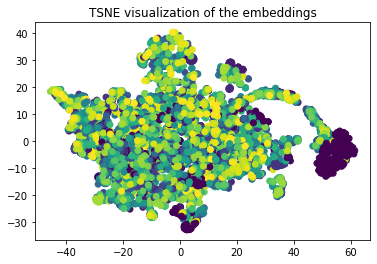

In [17]:
embs = []
archs = [[500,200,100],[500,200,100],[500,200],[500,200,100],[500,200,100],[500,200,100],[500,200],[200,50],[200,50]]
for i, network in enumerate(dd_nets):
    print(network.shape)
    embeddings, _, _ = dngr_pipeline(network, N_drugs, archs[i], K=3, alpha=0.98, n_epochs=1000, batch_size=50, activation='sigmoid', last_activation='sigmoid')
    embs.append(torch.Tensor(embeddings))

In [18]:
embs = [torch.Tensor(emb) for emb in embs]

In [19]:
X=torch.cat(embs,1)

### Embedding the proteins

(1915, 1915)


../src/dgnr.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  D_inv = np.diag(np.reciprocal(np.sum(M,axis=0)))


[1,    39] loss: 0.00026
[2,    39] loss: 0.00000
[3,    39] loss: 0.00000
[4,    39] loss: 0.00000
[5,    39] loss: 0.00000
[6,    39] loss: 0.00000
[7,    39] loss: 0.00000
[8,    39] loss: 0.00000
[9,    39] loss: 0.00000
[10,    39] loss: 0.00000
[11,    39] loss: 0.00000
[12,    39] loss: 0.00000
[13,    39] loss: 0.00000
[14,    39] loss: 0.00000
[15,    39] loss: 0.00000
[16,    39] loss: 0.00000
[17,    39] loss: 0.00000
[18,    39] loss: 0.00000
[19,    39] loss: 0.00000
[20,    39] loss: 0.00000
[21,    39] loss: 0.00000
[22,    39] loss: 0.00000
[23,    39] loss: 0.00000
[24,    39] loss: 0.00000
[25,    39] loss: 0.00000
[26,    39] loss: 0.00000
[27,    39] loss: 0.00000
[28,    39] loss: 0.00000
[29,    39] loss: 0.00000
[30,    39] loss: 0.00000
[31,    39] loss: 0.00000
[32,    39] loss: 0.00000
[33,    39] loss: 0.00000
[34,    39] loss: 0.00000
[35,    39] loss: 0.00000
[36,    39] loss: 0.00000
[37,    39] loss: 0.00000
[38,    39] loss: 0.00000
[39,    39] loss: 0.0

/home/michael/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


'dngr_pipeline'  1819904.46 ms
(1915, 1915)


../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    39] loss: 0.00044
[2,    39] loss: 0.00002
[3,    39] loss: 0.00002
[4,    39] loss: 0.00002
[5,    39] loss: 0.00002
[6,    39] loss: 0.00002
[7,    39] loss: 0.00002
[8,    39] loss: 0.00002
[9,    39] loss: 0.00002
[10,    39] loss: 0.00002
[11,    39] loss: 0.00002
[12,    39] loss: 0.00002
[13,    39] loss: 0.00002
[14,    39] loss: 0.00002
[15,    39] loss: 0.00002
[16,    39] loss: 0.00002
[17,    39] loss: 0.00002
[18,    39] loss: 0.00002
[19,    39] loss: 0.00002
[20,    39] loss: 0.00002
[21,    39] loss: 0.00002
[22,    39] loss: 0.00002
[23,    39] loss: 0.00002
[24,    39] loss: 0.00002
[25,    39] loss: 0.00002
[26,    39] loss: 0.00002
[27,    39] loss: 0.00002
[28,    39] loss: 0.00002
[29,    39] loss: 0.00002
[30,    39] loss: 0.00002
[31,    39] loss: 0.00002
[32,    39] loss: 0.00002
[33,    39] loss: 0.00002
[34,    39] loss: 0.00002
[35,    39] loss: 0.00002
[36,    39] loss: 0.00002
[37,    39] loss: 0.00002
[38,    39] loss: 0.00001
[39,    39] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    39] loss: 0.00046
[2,    39] loss: 0.00009
[3,    39] loss: 0.00009
[4,    39] loss: 0.00008
[5,    39] loss: 0.00007
[6,    39] loss: 0.00007
[7,    39] loss: 0.00007
[8,    39] loss: 0.00007
[9,    39] loss: 0.00007
[10,    39] loss: 0.00007
[11,    39] loss: 0.00007
[12,    39] loss: 0.00007
[13,    39] loss: 0.00007
[14,    39] loss: 0.00007
[15,    39] loss: 0.00006
[16,    39] loss: 0.00006
[17,    39] loss: 0.00005
[18,    39] loss: 0.00005
[19,    39] loss: 0.00004
[20,    39] loss: 0.00004
[21,    39] loss: 0.00004
[22,    39] loss: 0.00004
[23,    39] loss: 0.00004
[24,    39] loss: 0.00004
[25,    39] loss: 0.00004
[26,    39] loss: 0.00004
[27,    39] loss: 0.00004
[28,    39] loss: 0.00004
[29,    39] loss: 0.00004
[30,    39] loss: 0.00004
[31,    39] loss: 0.00004
[32,    39] loss: 0.00004
[33,    39] loss: 0.00003
[34,    39] loss: 0.00003
[35,    39] loss: 0.00003
[36,    39] loss: 0.00003
[37,    39] loss: 0.00003
[38,    39] loss: 0.00003
[39,    39] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    39] loss: 0.00049
[2,    39] loss: 0.00015
[3,    39] loss: 0.00014
[4,    39] loss: 0.00013
[5,    39] loss: 0.00012
[6,    39] loss: 0.00012
[7,    39] loss: 0.00012
[8,    39] loss: 0.00012
[9,    39] loss: 0.00011
[10,    39] loss: 0.00011
[11,    39] loss: 0.00010
[12,    39] loss: 0.00008
[13,    39] loss: 0.00008
[14,    39] loss: 0.00007
[15,    39] loss: 0.00007
[16,    39] loss: 0.00007
[17,    39] loss: 0.00006
[18,    39] loss: 0.00005
[19,    39] loss: 0.00005
[20,    39] loss: 0.00004
[21,    39] loss: 0.00004
[22,    39] loss: 0.00004
[23,    39] loss: 0.00004
[24,    39] loss: 0.00004
[25,    39] loss: 0.00004
[26,    39] loss: 0.00003
[27,    39] loss: 0.00003
[28,    39] loss: 0.00003
[29,    39] loss: 0.00003
[30,    39] loss: 0.00003
[31,    39] loss: 0.00003
[32,    39] loss: 0.00003
[33,    39] loss: 0.00003
[34,    39] loss: 0.00003
[35,    39] loss: 0.00003
[36,    39] loss: 0.00003
[37,    39] loss: 0.00002
[38,    39] loss: 0.00002
[39,    39] loss: 0.0

../src/dgnr.py:92: RuntimeWarning: divide by zero encountered in log
  P = np.log(P)


[1,    39] loss: 0.00044
[2,    39] loss: 0.00004
[3,    39] loss: 0.00004
[4,    39] loss: 0.00004
[5,    39] loss: 0.00004
[6,    39] loss: 0.00004
[7,    39] loss: 0.00003
[8,    39] loss: 0.00003
[9,    39] loss: 0.00003
[10,    39] loss: 0.00003
[11,    39] loss: 0.00003
[12,    39] loss: 0.00003
[13,    39] loss: 0.00003
[14,    39] loss: 0.00003
[15,    39] loss: 0.00003
[16,    39] loss: 0.00003
[17,    39] loss: 0.00003
[18,    39] loss: 0.00003
[19,    39] loss: 0.00003
[20,    39] loss: 0.00003
[21,    39] loss: 0.00003
[22,    39] loss: 0.00003
[23,    39] loss: 0.00003
[24,    39] loss: 0.00003
[25,    39] loss: 0.00003
[26,    39] loss: 0.00003
[27,    39] loss: 0.00003
[28,    39] loss: 0.00003
[29,    39] loss: 0.00003
[30,    39] loss: 0.00003
[31,    39] loss: 0.00003
[32,    39] loss: 0.00003
[33,    39] loss: 0.00003
[34,    39] loss: 0.00003
[35,    39] loss: 0.00003
[36,    39] loss: 0.00003
[37,    39] loss: 0.00003
[38,    39] loss: 0.00002
[39,    39] loss: 0.0

../src/dgnr.py:43: RuntimeWarning: divide by zero encountered in reciprocal
  D_inv = np.diag(np.reciprocal(np.sum(M,axis=0)))


[1,    39] loss: 0.00048
[2,    39] loss: 0.00000
[3,    39] loss: 0.00000
[4,    39] loss: 0.00000
[5,    39] loss: 0.00000
[6,    39] loss: 0.00000
[7,    39] loss: 0.00000
[8,    39] loss: 0.00000
[9,    39] loss: 0.00000
[10,    39] loss: 0.00000
[11,    39] loss: 0.00000
[12,    39] loss: 0.00000
[13,    39] loss: 0.00000
[14,    39] loss: 0.00000
[15,    39] loss: 0.00000
[16,    39] loss: 0.00000
[17,    39] loss: 0.00000
[18,    39] loss: 0.00000
[19,    39] loss: 0.00000
[20,    39] loss: 0.00000
[21,    39] loss: 0.00000
[22,    39] loss: 0.00000
[23,    39] loss: 0.00000
[24,    39] loss: 0.00000
[25,    39] loss: 0.00000
[26,    39] loss: 0.00000
[27,    39] loss: 0.00000
[28,    39] loss: 0.00000
[29,    39] loss: 0.00000
[30,    39] loss: 0.00000
[31,    39] loss: 0.00000
[32,    39] loss: 0.00000
[33,    39] loss: 0.00000
[34,    39] loss: 0.00000
[35,    39] loss: 0.00000
[36,    39] loss: 0.00000
[37,    39] loss: 0.00000
[38,    39] loss: 0.00000
[39,    39] loss: 0.0

/home/michael/.local/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


'dngr_pipeline'  1004116.72 ms


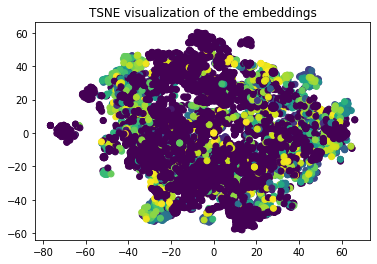

In [20]:
embs = []
archs = [[1000,500,100],[500,200],[500,200],[500,200],[500,200],[500,100]]

for i,network in enumerate(pp_nets):
    print(network.shape)
    embeddings, _, _ = dngr_pipeline(network, N_targets, archs[i], K=3, alpha=0.98, n_epochs=1000, batch_size=50, activation='sigmoid', last_activation='sigmoid')
    embs.append(torch.Tensor(embeddings))

In [21]:
embs = [torch.Tensor(emb) for emb in embs]

In [22]:
Y=torch.cat(embs,1)

In [23]:
Y.size()

torch.Size([1915, 1000])

### Saving both tensors in the repr directory

In [24]:
np.savetxt(os.path.join('..','repr','X.csv'), X.detach().numpy(), delimiter='\t')
np.savetxt(os.path.join('..','repr','Y.csv'), Y.detach().numpy(), delimiter='\t')

### Reading pre-embedded drugs and proteins

In [5]:
X = torch.Tensor(readnet(os.path.join('..','repr','X.csv')))
Y = torch.Tensor(readnet(os.path.join('..','repr','Y.csv')))

### PU-Learning step to learn new drug-target interactions

In [6]:
#S, H, W, b_x, b_y, train, test=pu_learning_new(100, X, Y, dp_net, batch_size=50, lr=1e-5, n_epochs=2000, train_size=0.8, alpha=0.03, gamma=0.01)
S, auc, pr, acc = cross_validate(100, X, Y, dp_net, 5, n_epochs=1000, batch_size=50, lr=1e-5, alpha=0.5, gamma=0.1, activation='sigmoid')

print("ROC auc :", auc)
print("PR auc :", pr)
print("Accuracy :", acc)

Fold 1
Preparing the masks...
Starting to learn...
Building the train loader...
Number of variables: 200000
Finding positive and negative examples...
Number of train examples: 7964
Number of positive examples in train set: 3982
Number of negative/unlabelled examples in train set: 3982
[1] loss: 0.485, auc: 0.477, acc: 0.473
[2] loss: 0.434, auc: 0.537, acc: 0.527
[3] loss: 0.375, auc: 0.569, acc: 0.563
[4] loss: 0.344, auc: 0.591, acc: 0.587
[5] loss: 0.330, auc: 0.600, acc: 0.597
[6] loss: 0.324, auc: 0.605, acc: 0.602
[7] loss: 0.317, auc: 0.613, acc: 0.607
[8] loss: 0.312, auc: 0.620, acc: 0.613
[9] loss: 0.305, auc: 0.629, acc: 0.621
[10] loss: 0.297, auc: 0.637, acc: 0.628
[11] loss: 0.290, auc: 0.646, acc: 0.637
[12] loss: 0.285, auc: 0.655, acc: 0.644
[13] loss: 0.279, auc: 0.668, acc: 0.656
[14] loss: 0.273, auc: 0.677, acc: 0.662
[15] loss: 0.262, auc: 0.695, acc: 0.679
[16] loss: 0.255, auc: 0.705, acc: 0.688
[17] loss: 0.242, auc: 0.727, acc: 0.709
[18] loss: 0.229, auc: 0.7

In [66]:
np.savetxt(os.path.join('..','repr','S.csv'), S.detach().numpy(), delimiter='\t')

### Searching for best interactions

In [8]:
_, indices = S.flatten().sort(descending=True)

In [9]:
indices

tensor([ 383242,  239678,  239619,  ...,  644761, 1198196, 1196281])

In [10]:
best_targets = indices % N_targets

In [11]:
best_drugs = indices // N_targets

In [12]:
best_targets

tensor([ 242,  303,  244,  ..., 1321, 1321, 1321])

In [13]:
best_drugs

tensor([200, 125, 125,  ..., 336, 625, 624])

In [14]:
best_interactions = torch.cat((torch.unsqueeze(best_drugs,1), torch.unsqueeze(best_targets,1)), 1)

In [15]:
f = open(os.path.join(basedir,'drug_dict.txt'), 'r')

drug_names= f.readlines()

f.close()

f = open(os.path.join(basedir,'protein_dict.txt'), 'r')

protein_names = f.readlines()

f.close()

In [84]:
drug_dict = {k.strip(): v for v, k in enumerate(drug_names)}

In [85]:
protein_dict = {k.strip(): v for v, k in enumerate(protein_names)}

In [58]:
n_top = 100

for inter in best_interactions[:n_top,:]:
    drug_i = inter[0].item()
    target_i = inter[1].item()
    print(drug_names[drug_i].strip()+ '\t\t', protein_names[target_i].strip(), "\t\t%.4f" % S[drug_i, target_i].item(), '\t\t%d' % int(dp_net[drug_i, target_i].item()))

DB00374:Treprostinil		 3360:HTR4 		0.9991 		0
DB01240:Epoprostenol		 3360:HTR4 		0.9989 		0
DB00374:Treprostinil		 1814:DRD3 		0.9988 		0
DB00374:Treprostinil		 1812:DRD1 		0.9987 		0
DB00257:Clotrimazole		 3360:HTR4 		0.9985 		0
DB00374:Treprostinil		 3358:HTR2C 		0.9985 		0
DB00486:Nabilone		 3360:HTR4 		0.9985 		0
DB00374:Treprostinil		 154:ADRB2 		0.9983 		0
DB01240:Epoprostenol		 1812:DRD1 		0.9983 		0
DB00257:Clotrimazole		 1812:DRD1 		0.9982 		1
DB00477:Chlorpromazine		 154:ADRB2 		0.9982 		0
DB00477:Chlorpromazine		 153:ADRB1 		0.9981 		0
DB00502:Haloperidol		 154:ADRB2 		0.9981 		1
DB01240:Epoprostenol		 1814:DRD3 		0.9980 		0
DB00321:Amitriptyline		 154:ADRB2 		0.9980 		0
DB00502:Haloperidol		 153:ADRB1 		0.9980 		0
DB01100:Pimozide		 154:ADRB2 		0.9980 		0
DB00257:Clotrimazole		 3358:HTR2C 		0.9980 		1
DB00929:Misoprostol		 3360:HTR4 		0.9980 		0
DB01100:Pimozide		 153:ADRB1 		0.9979 		0
DB00374:Treprostinil		 3357:HTR2B 		0.9979 		0
DB00374:Treprostinil		 153:ADRB1 		0.9979

### Reading DeepDTnet authors' results

In [27]:
results_path = os.path.join(basedir, 'supplementary', 'predicted_deepdtnet.xlsx')

In [37]:
import pandas as pd

df = pd.read_excel(results_path)

In [38]:
df = df.drop(index=[27634], columns=['Link', 'DT in drugcentral'])

mapper = {'Predicted Score by deepDTnet (High scores represent the high-confidence prediction)': 'Prediction',
          'Target_ID (Entrez ID)': 'Target_ID',
          'Label(label=1 means the known experimentally validated drug-target interactions)':'Label'}
df = df.rename(columns=mapper)

df

,Drug_ID,Drug_Name,Target_ID,Target_Name,Prediction,Label
0,DB01118,Amiodarone,3757.0,KCNH2,1.16660,1.0
1,DB00477,Chlorpromazine,1813.0,DRD2,1.13950,1.0
2,DB06616,Bosutinib,2050.0,EPHB4,1.13660,1.0
3,DB00458,Imipramine,6532.0,SLC6A4,1.13650,1.0
4,DB00661,Verapamil,3757.0,KCNH2,1.13510,1.0
...,...,...,...,...,...,...
27629,DB01204,Mitoxantrone,19.0,ABCA1,0.34002,0.0
27630,DB00114,Pyridoxal Phosphate,2900.0,GRIK4,0.34001,0.0
27631,DB00191,Phentermine,1233.0,CCR4,0.34000,0.0
27632,DB01100,Pimozide,8973.0,CHRNA6,0.34000,0.0


In [68]:
df[(df['Drug_Name']=='Topotecan') & ()]

,Drug_ID,Drug_Name,Target_ID,Target_Name,Prediction,Label
2604,DB01030,Topotecan,55244.0,SLC47A1,0.90863,1.0
3026,DB01030,Topotecan,367.0,AR,0.88981,1.0
3563,DB01030,Topotecan,28234.0,SLCO1B3,0.86698,0.0
3598,DB01030,Topotecan,11309.0,SLCO2B1,0.86554,0.0
4143,DB01030,Topotecan,10599.0,SLCO1B1,0.84210,0.0
...,...,...,...,...,...,...
27418,DB01030,Topotecan,6524.0,SLC5A2,0.34152,0.0
27430,DB01030,Topotecan,58485.0,TRAPPC1,0.34147,0.0
27527,DB01030,Topotecan,51564.0,HDAC7,0.34078,0.0
27593,DB01030,Topotecan,5708.0,PSMD2,0.34023,0.0


In [50]:
b = True

for i, row in df.iterrows():
    drug_db = row['Drug_ID']
    drugid = drug_dict[drug_db]
    
    target_num = str(int(row['Target_ID']))
    targetid = protein_dict[target_num]
    
    label = row['Label']
    b = b and (dp_net[drugid,targetid].item() == label)
    
print(b)

True


 ### Focusing on ROR-gt

In [94]:
S.detach().numpy()

protein_dict

prediction_df = pd.DataFrame(S.detach().numpy(), index=drug_dict.keys(), columns=protein_dict.keys())

prediction_df['6097:RORC'].sort_values(ascending=False).iloc[:60]

DB00307:Bexarotene               0.969182
DB00997:Doxorubicin              0.966331
DB00179:Masoprocol               0.959368
DB00396:Progesterone             0.959191
DB00255:Diethylstilbestrol       0.956320
DB00523:Alitretinoin             0.953660
DB00445:Epirubicin               0.953175
DB00694:Daunorubicin             0.953002
DB00783:Estradiol                0.947355
DB02546:Vorinostat               0.946390
DB01030:Topotecan                0.943142
DB00755:Tretinoin                0.941014
DB00421:Spironolactone           0.940159
DB01196:Estramustine             0.939159
DB00655:Estrone                  0.935508
DB01024:Mycophenolic acid        0.932465
DB00823:Ethynodiol               0.931816
DB00631:Clofarabine              0.926223
DB00717:Norethisterone           0.916285
DB00834:Mifepristone             0.916199
DB01169:Arsenic trioxide         0.914514
DB01073:Fludarabine              0.912785
DB00624:Testosterone             0.907899
DB04573:Estriol                  0

In [65]:
from sklearn.metrics import roc_auc_score, accuracy_score, average_precision_score

y_pred = []
y_pred_bin = []
y_true = []

imax = 1000

for i, row in df.iterrows():
    drug_db = row['Drug_ID']
    drugid = drug_dict[drug_db]
    
    target_num = str(int(row['Target_ID']))
    targetid = protein_dict[target_num]
    
    label = row['Label']
    
    y_pred.append(S[drugid,targetid].item())
    y_pred_bin.append(int(S[drugid,targetid].item() > 0.5))
    y_true.append(label)
    
    if i >= imax-1:
        break

print('Stats on the %d first predicted interactions by deepDTnet\n' % imax)

y_pred = np.array(y_pred)
y_true = np.array(y_true, dtype=int)

print("Number of positive / negative labels : %d / %d" % (y_true.sum(), (1-y_true).sum()))
print('ROC AUC score :', roc_auc_score(y_true, y_pred))

print('Mean score (std) : %f (%f)' % (y_pred.mean(), y_pred.std()))

Stats on the 1000 first predicted interactions by deepDTnet

Number of positive / negative labels : 802 / 198
ROC AUC score : 0.5402214161565783
Mean score (std) : 0.970432 (0.027224)


### W and H

In [27]:
import seaborn
import matplotlib.pyplot as plt

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
w = W.detach().numpy()

In [105]:
W

Parameter containing:
tensor([[ 6.6103e-39, -6.2515e-04, -1.3230e-03,  ..., -1.4601e-03,
         -6.7755e-39, -2.6870e-04],
        [ 6.3478e-39,  2.2038e-03, -1.9262e-04,  ...,  3.0390e-03,
          6.6533e-39,  8.6414e-05],
        [-6.5590e-39,  1.5702e-05,  1.5702e-05,  ...,  1.6912e-05,
          6.0987e-39,  1.3256e-05],
        ...,
        [-6.7867e-39,  4.7291e-04, -1.0593e-04,  ...,  9.7625e-04,
         -6.6473e-39,  5.4107e-05],
        [ 2.1730e-39,  9.6036e-06,  9.6036e-06,  ...,  7.3870e-06,
          6.5722e-39,  1.3215e-05],
        [-6.7251e-39,  9.3853e-03,  6.0386e-03,  ...,  2.4060e-03,
          6.5800e-39,  7.3864e-04]], requires_grad=True)

(array([[155., 146., 138., ...,  10.,   0.,   0.],
        [636.,  54.,  11., ...,   1.,   9.,   8.],
        [664.,  62.,   6., ...,   0.,   0.,   0.],
        ...,
        [677.,  47.,   8., ...,   0.,   0.,   0.],
        [384., 132.,  68., ...,   8.,   7.,   1.],
        [ 20.,  79.,  99., ...,  68.,  72.,  66.]]),
 array([1.6229189e-05, 9.9922918e-02, 1.9982961e-01, 2.9973629e-01,
        3.9964297e-01, 4.9954966e-01, 5.9945637e-01, 6.9936305e-01,
        7.9926974e-01, 8.9917642e-01, 9.9908310e-01], dtype=float32),
 <a list of 1915 Lists of Patches objects>)

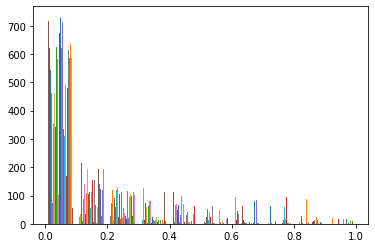

In [20]:
plt.hist(S.detach().numpy())

In [89]:
sc = MinMaxScaler()
w_scaled = sc.fit_transform(w)

<AxesSubplot:>

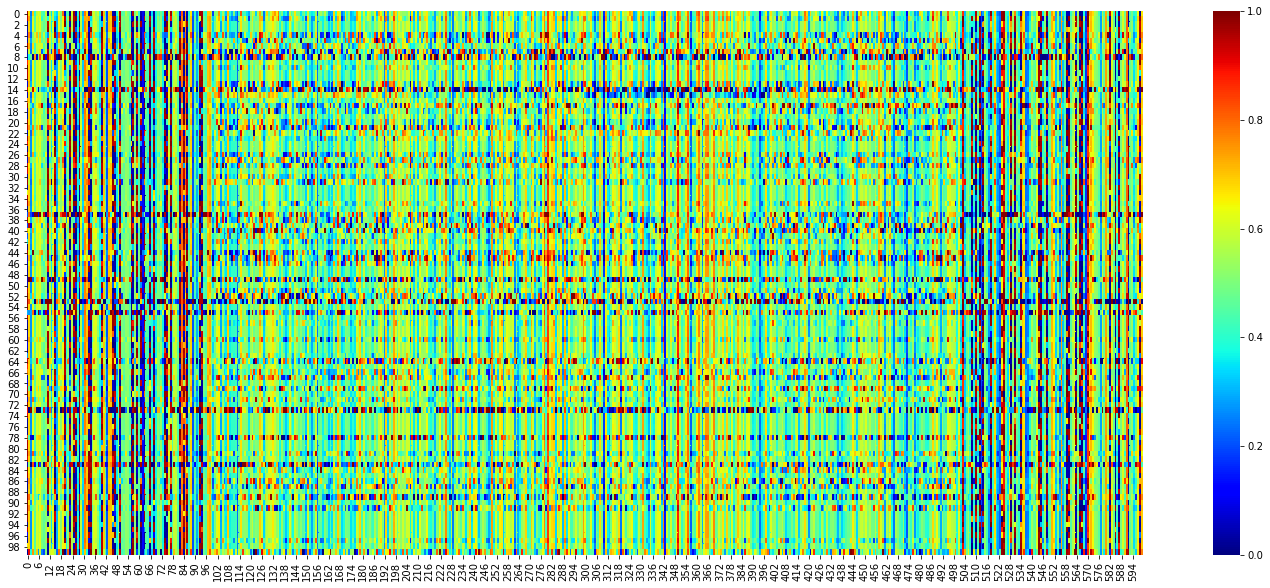

In [91]:
W0 = W

fig, ax = plt.subplots(figsize=(25,10))         

#seaborn.heatmap(W0.detach().numpy(), ax=ax, vmin=0, vmax=1, cmap='jet')
seaborn.heatmap(w_scaled, ax=ax, cmap='jet')